# Explore here

# ÍNDICE

1. [CARGA DE DATOS Y PRIMERAS IMPRESIONES](#1-carga-de-datos-y-primeras-impresiones)  
2. [LIMPIEZA Y TRATAMIENTO DE NULOS](#2-limpieza-y-tratamiento-de-nulos)  
3. [ANÁLISIS UNIVARIADO (UNIVARIANTE)](#3-análisis-univariado-univariante)  
   - [3.1: Categóricas](#31-categóricas)  
   - [3.2: Numéricas](#32-numéricas)  
4. [ANÁLISIS BIVARIADO O MULTIVARIANTE](#4-análisis-bivariado-o-multivariante)  
   - [4.1 Numérico-numérico](#41-numérico-numérico)  
   - [4.2 Categórico-categórico](#42-categórico-categórico)  
5. [ANÁLISIS DE CORRELACIONES](#5-análisis-de-correlaciones)  
6. [OUTLIERS (VALORES ATÍPICOS)](#6-outliers-valores-atípicos)  
7. [FEATURE ENGINEERING: "ESCALADO Y NORMALIZACIÓN DE VALORES"](#7-feature-engineering-escalado-y-normalización-de-valores)  
   - [7.1 Normalización](#71-normalización)  
   - [7.2 Escalado mín-max](#72-escalado-mín-max)
8. [MODELO DE REGRESIÓN LINEAL](#8-modelo-de-regresión-lineal)


## 1. CARGA DE DATOS Y PRIMERAS IMPRESIONES ##

In [55]:
# Your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

sns.set(
    style="whitegrid",     
    palette="pastel",              
)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [56]:
total_data.shape

(1338, 7)

Podemos observar que el presente dataset a analizar contiene 1.338 líneas y 7 columnas.

In [57]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


De estas 7 columnas mencionadas previamente, ninguna contiene valores nulos. Por otro lado, 4 son numéricas y 3 categóricas.

## 2. LIMPIEZA Y TRATAMIENTO DE NULOS ##

In [58]:
total_data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


En la tabla anterior podemos observar que se ha eliminado 1 línea duplicada.

In [59]:
total_data.drop(["region"], axis = 1, inplace = True)
total_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.92
1,18,male,33.77,1,no,1725.55
2,28,male,33.00,3,no,4449.46
3,33,male,22.70,0,no,21984.47
4,32,male,28.88,0,no,3866.86


Teniendo en cuenta que el análisis se basará en la predicción de las "charges" dependiendo de las características fisiológicas del usuario, se ha decidido eliminar la "region" de éste, ya que, si podría ser interesante para otro tipo de análisis u objetivo, en este caso no se considera relevante.

In [60]:
total_data.shape

(1338, 6)

# 3. ANÁLISIS UNIVARIADO (UNIVARIANTE)

3.1 CATEGÓRICAS:

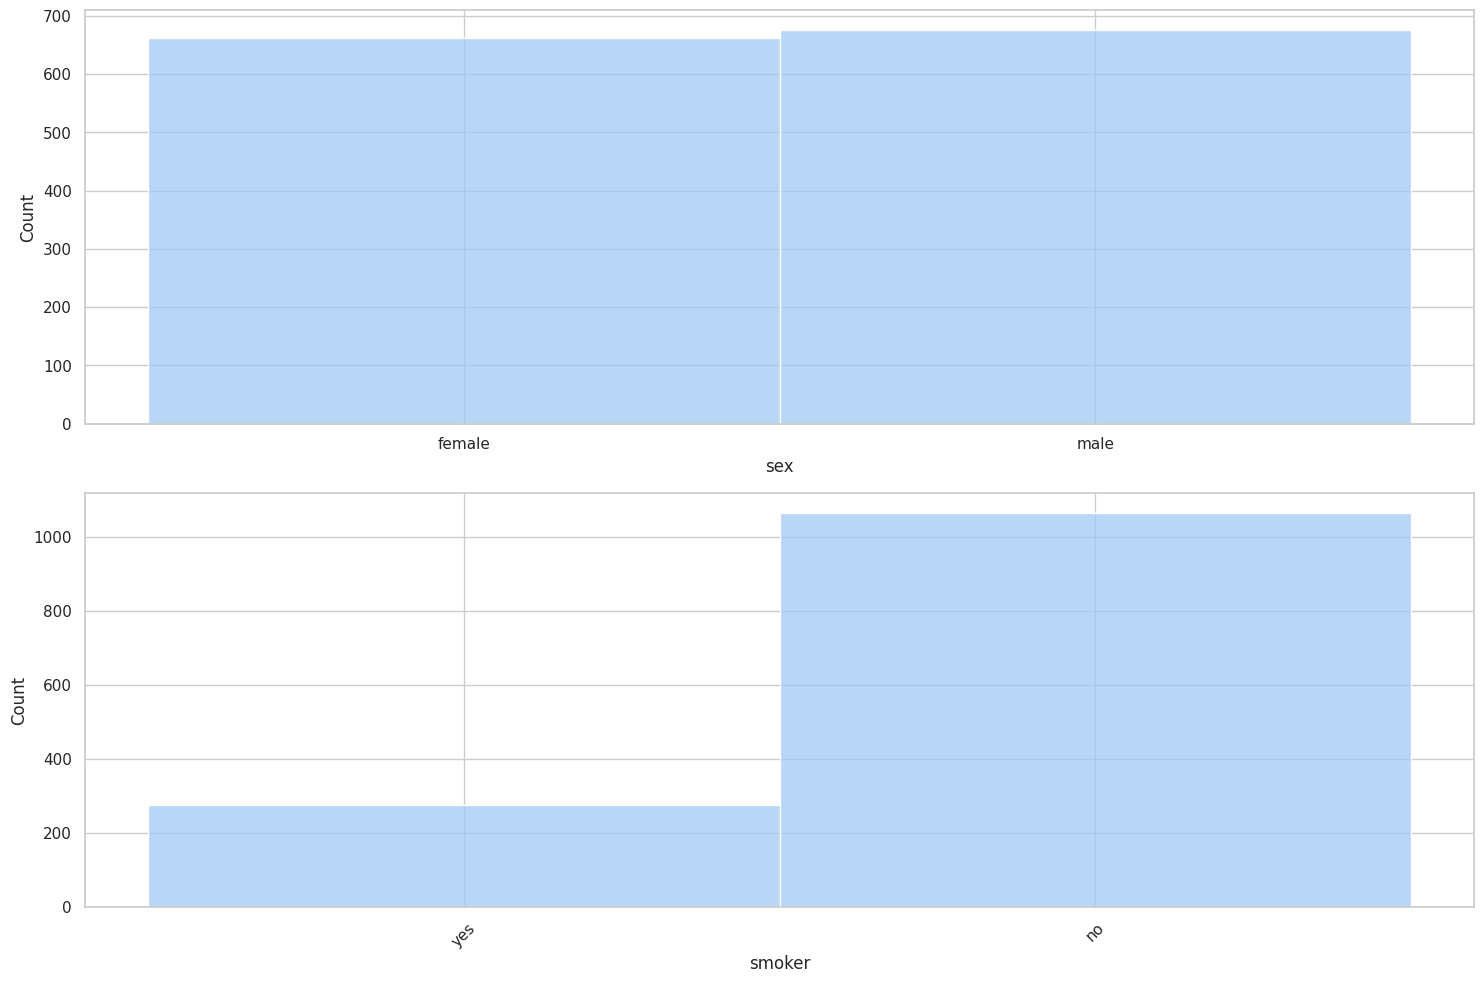

In [61]:
fig, axis = plt.subplots(2, figsize=(15, 10))

sns.histplot(ax = axis[0], data = total_data, x = "sex")
plt.xticks(rotation=45)
sns.histplot(ax = axis[1], data = total_data, x = "smoker")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


En los anteriores 2 gráficos, podemos observar que:

- A nivel de sexos: femenino y masculino, hay casi el 50 % de usuarios de cada género. Las diferendcias en cifras serían mínimas y por ello no significativas.

- A nivel de fumador/no fumador: Si bien la cantidad de fumadores es menor a 350 usuarios, la de no fumadores supera los 1.000. En este caso es clara la diferencia entre ambas categorías, y por ello las tendremos muy en cuenta para futuroa análisis multivariante.

3.2 NUMÉRICAS:

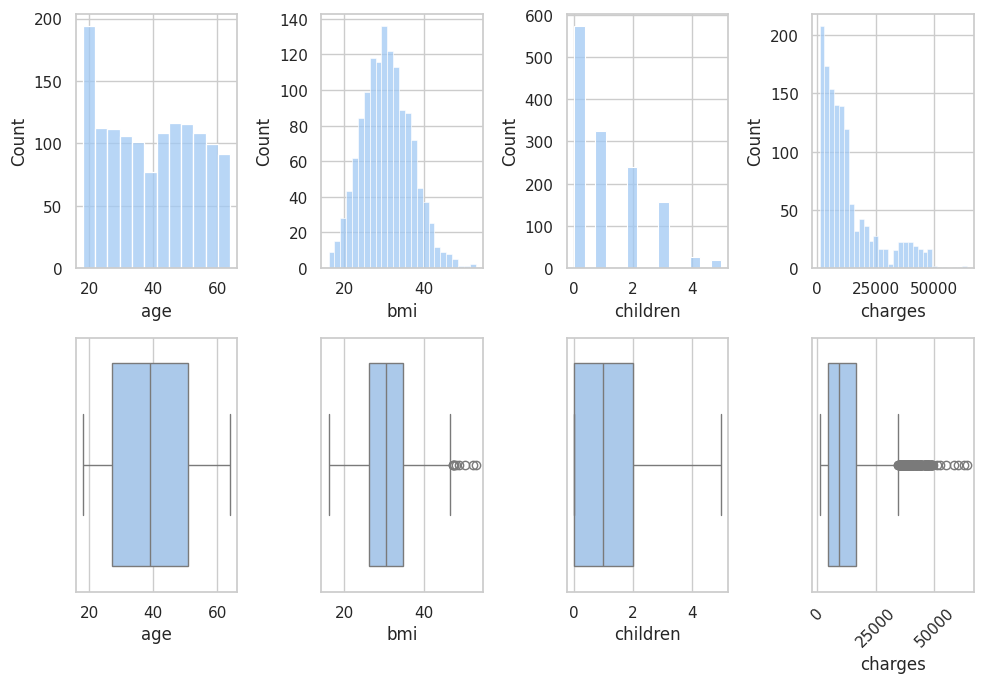

In [62]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")
sns.histplot(ax = axis[0,2], data = total_data, x = "children")
sns.boxplot(ax = axis[1,2], data = total_data, x = "children")
sns.histplot(ax = axis[0,3], data = total_data, x = "charges")
sns.boxplot(ax = axis[1,3], data = total_data, x = "charges")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En los gráficos anteriores podemos observar un análisis de las 4 variables numéricas del dataset, con dos gráficos por cada una para un mejor análisis (histograma+boxplot):

- Edad: se observa que, si bien generalmente no hay diferencias significativas, la edad de 20 años es exponencialmente superior al resto, y la de 40 tiene un descenso notable a nivel de usuarios. Tal es dicha diferencia que podríamos decir que los usuarios que rondan los 20 años duplican aquellos de los 40. El diagrama de caja nos muestra que el bigote infoerior se encontraria en edades menroes a los 20 y el superior, un poco por encima de los 60. La caja per se se encuentra entre los aproximadamente 27 hasta los 50, sin outliers.

- BMI: El índice de masa corporal de los usuarios encuentra su media entre la cifra de 20 y 30, bastante centralizada por el 30, si bien sus bigotes inferior y superior se encontrarían en cifras ligeramente inferiores a 20 y superiores a 50. Por otro lado es significativo la cantidad de outliers que se resaltan por encima de este valor, circunstancia que tendremos en cuenta para futura exploración de esta variable.

- Children, cantidad de hijos por usuario: claramente los valores se encuentran entre 0 y 2 hijos. Pese a esto, el bigote superior se encuentra en los 5 hijos, sin outliers observables.

- Charges, costes actuales: la mayoría de usuarios se encuentra en las cifras inferiores a nivel de "charges" por parte del seguro médico, y el aumento tiene un descenso escalado, si bien hay numerosos outliers en las cifras superiores a los 30.000.



# 4. ANÁLISIS BIVARIADO O MULTIVARIANTE 

4.1 NUMÉRICO-NUMÉRICO

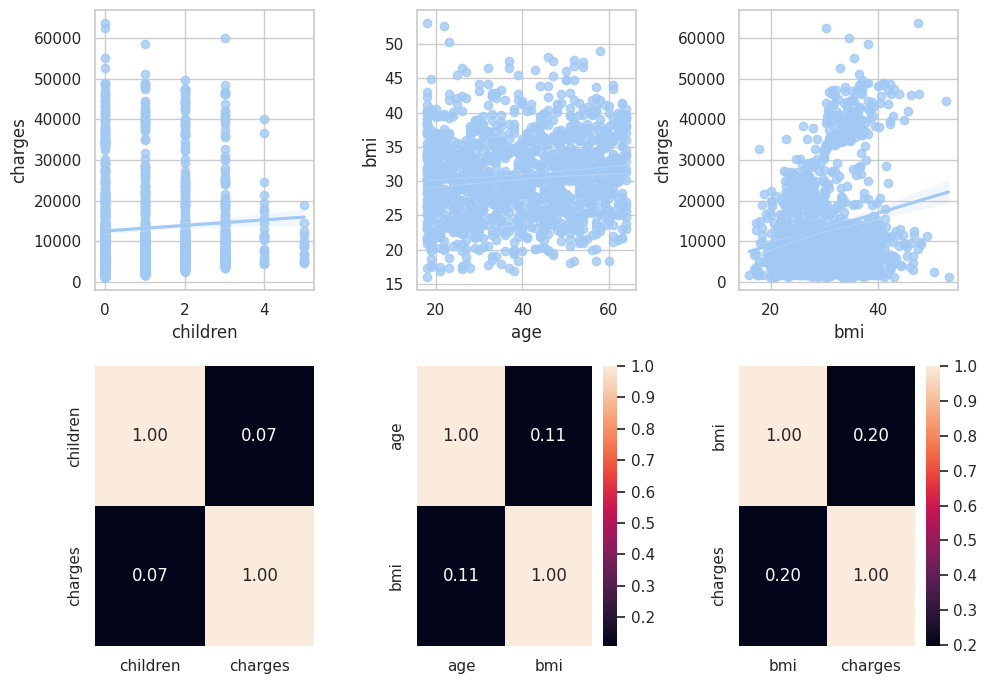

In [63]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "bmi")
sns.heatmap(total_data[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

plt.tight_layout()

plt.show()


En el anterior análisis multivariante numérico numérico comparamos 3 variables con 2 gráficos por cada una de ellas.

- Charges / children: correlación de 0.07, si bien a priori puede parecer poca, la línea de regresión es ligeramente positiva y las nubes de puntos en cuanto a los cargos también.

- Masa índice corporal con edad: 0.11 de correlación, es decir, hay más correlación entre estas dos variables que con las anteriores. Esto indica que según la edad los IBM están más estandarizados a priori. Si bien hay mucha más dispersión de cantidades en los puntos en esta nube, estan bastante unidos y la línea de regresión es ligeramente positiva.

- IBM y cargos (costo): 0.20 de correlación. Por ahora,de los 3 gráficos, el que más correlación tiene, es decir, índice de masa corporal y costo, que, al final, es nuestro target, y por lo tanto es un dato referente a remarcar. 

4.2 CATEGÓRICO-CATEGÓRICO

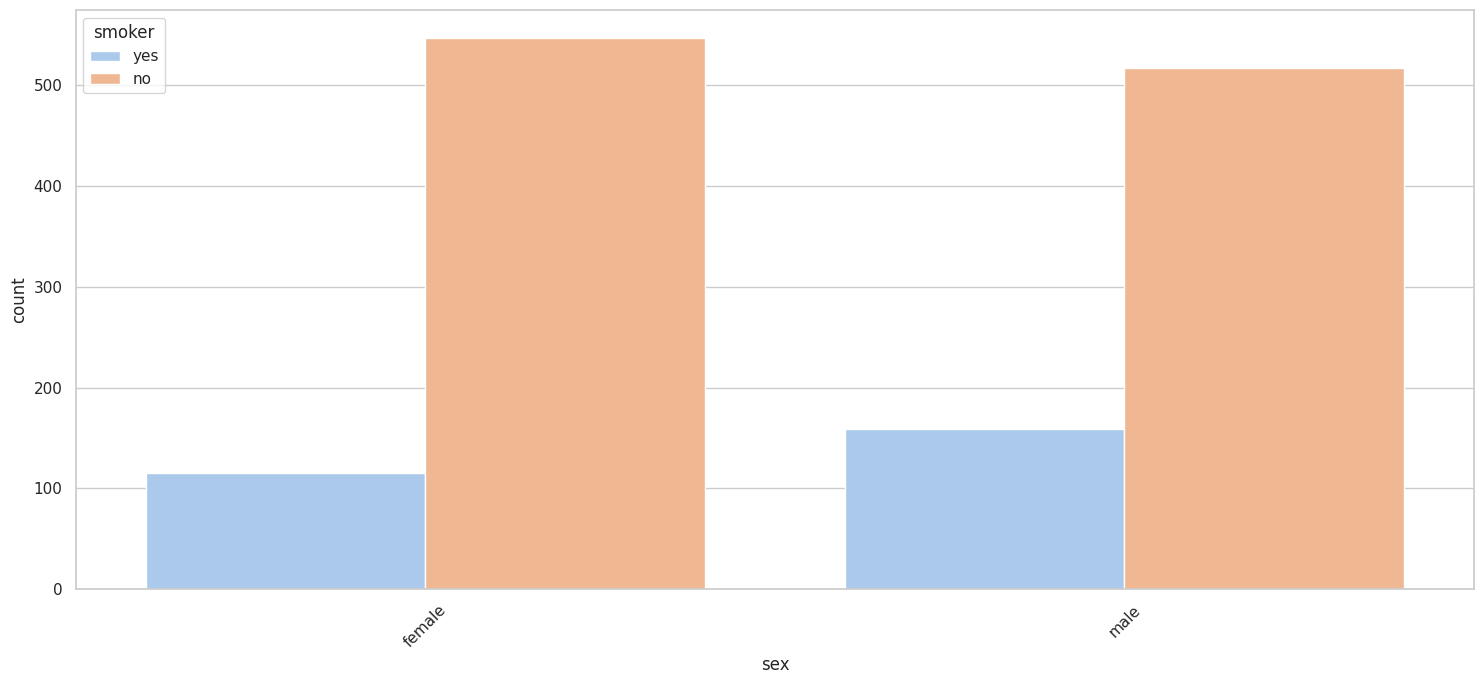

In [64]:
fig, axis = plt.subplots(1, figsize = (15, 7))

sns.countplot(data = total_data, x = "sex", hue = "smoker")
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

En el anterior countplot se ha llevado a cabo un análisis multivariante de dos variantes categóricas: sexo y fumador/no fumador.

En este caso observamos lo siguiente: como hemos mencionado anteriormente el total de usuarios de género masculino y femenino estarían a la par a nivel de cifra.

- Sobre el género femenino: una cifra superior a lo 500 no serian fumadoras, vs aproximadamente 100 (cifra ligeramente superior), que sí lo son.

- Sobre el género masculino: una cifra ligeramente superior a los 500 no serían fumadores, vs unos 170 que sí lo serían. 

Así pues, si bien las cifras no son mucho mayores, sí indicamos que hay más usuarios fumadores masculinos que femeninos. 

4.3 Combinaciones de la clase con varias predictoras

In [65]:
top_10_charges = total_data['charges'].value_counts().nlargest(10).index
filtered_data = total_data[total_data['charges'].isin(top_10_charges)]

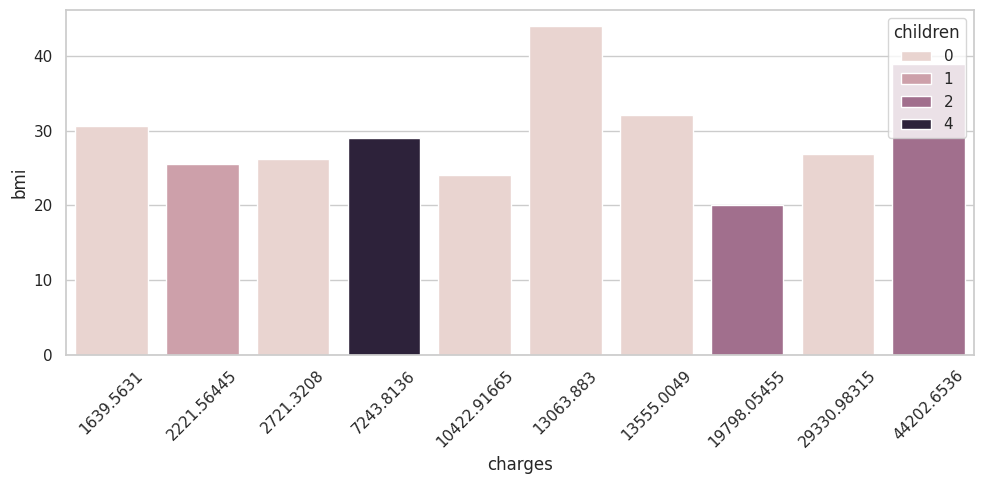

In [66]:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)


sns.barplot(data = filtered_data, x = "charges", y = "bmi", hue = "children")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este caso no hemos encontrado otra opción para observar mejor este tipo de gráficos y hemos decidido filtrar por el top 10 de "charges" del total del dataset. Así pues, hemos querido comparar este dato con el índice de masa corporal y el número de hijos. 

De todos modos, al creer que no es un gráfico útil ni intuitivo, no lo usaría en un EDA real para una empresa ya que creo que hay otros, en esta ocasión, más útiles.

# 5. ANÁLISIS DE CORRELACIONES

In [67]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data[["sex_n", "sex"]]

,sex_n,sex
0,0,female
1,1,male
2,1,male
3,1,male
4,1,male
...,...,...
1333,1,male
1334,0,female
1335,0,female
1336,0,female


In [68]:
sex_rules = {row["sex"]: row["sex_n"] for index, row in total_data[["sex_n", "sex"]].drop_duplicates().iterrows()}
print(sex_rules)

import json

with open("./sex_rules.json", "w") as f:
  json.dump(sex_rules, f)

with open("./sex_rules.json", "r") as f:
    y_rules = json.load(f)
print("2", sex_rules)

total_data["sex_n"] = total_data["sex"].apply(lambda x: sex_rules[x])
total_data

{'female': 0, 'male': 1}
2 {'female': 0, 'male': 1}


,age,sex,bmi,children,smoker,charges,sex_n
0,19,female,27.90,0,yes,16884.92,0
1,18,male,33.77,1,no,1725.55,1
2,28,male,33.00,3,no,4449.46,1
3,33,male,22.70,0,no,21984.47,1
4,32,male,28.88,0,no,3866.86,1
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,10600.55,1
1334,18,female,31.92,0,no,2205.98,0
1335,18,female,36.85,0,no,1629.83,0
1336,21,female,25.80,0,no,2007.94,0


In [69]:
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data[["smoker_n", "smoker"]]

,smoker_n,smoker
0,0,yes
1,1,no
2,1,no
3,1,no
4,1,no
...,...,...
1333,1,no
1334,1,no
1335,1,no
1336,1,no


In [70]:
smoker_rules = {row["smoker"]: row["smoker_n"] for index, row in total_data[["smoker_n", "smoker"]].drop_duplicates().iterrows()}
print(smoker_rules)

import json

with open("./smoker_rules.json", "w") as f:
  json.dump(smoker_rules, f)

with open("./smoker_rules.json", "r") as f:
    smoker_rules = json.load(f)
print("2", smoker_rules)

total_data["smoker_n"] = total_data["smoker"].apply(lambda x: smoker_rules[x])
total_data

{'yes': 0, 'no': 1}
2 {'yes': 0, 'no': 1}


,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.90,0,yes,16884.92,0,0
1,18,male,33.77,1,no,1725.55,1,1
2,28,male,33.00,3,no,4449.46,1,1
3,33,male,22.70,0,no,21984.47,1,1
4,32,male,28.88,0,no,3866.86,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,10600.55,1,1
1334,18,female,31.92,0,no,2205.98,0,1
1335,18,female,36.85,0,no,1629.83,0,1
1336,21,female,25.80,0,no,2007.94,0,1


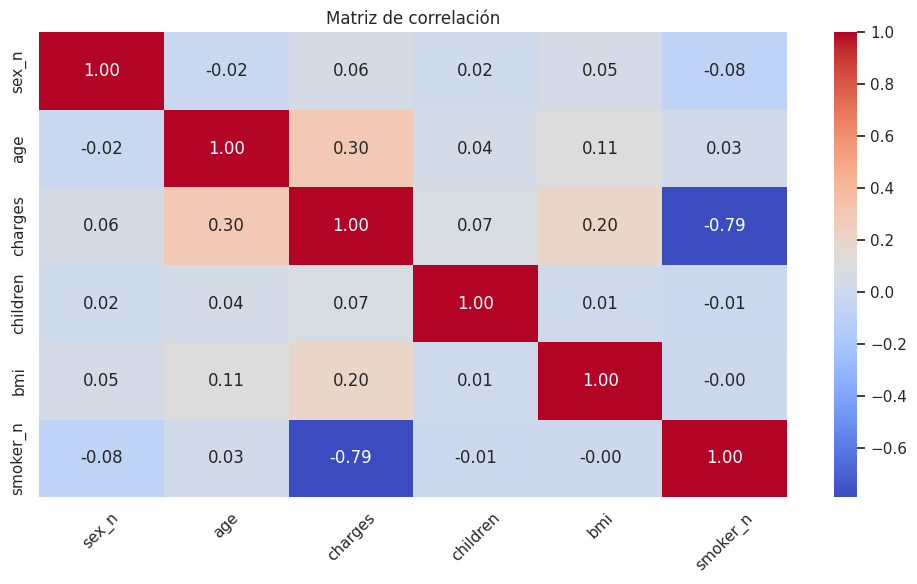

In [71]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["sex_n", "age", "charges", "children", "bmi", "smoker_n"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

En este caso para generar este mapa de calor con las correlaciones entre variables, se ha factorizado género y categoría de fumador/no fumador.

Así pues, de entre todas las variables, aquellas que nos llamar más la atención serían las correlaciones:

- Fumador/no fumador - charges: -0.79 
- Edad - charges: 0.30
- IBM - charges: 0.20

Esto nos indica que efetivamente hay relación entre costos de la aseguradora y si el cliente es o no fumador, su edad, y su índice de masa corporal. Por lo tanto, no sólo el coste tendría relación con las características fisiológicas per se del usuario del servicio, sino también de decisiones propias que afectan a la salud del mismo, como el tabaquismo en este caso.

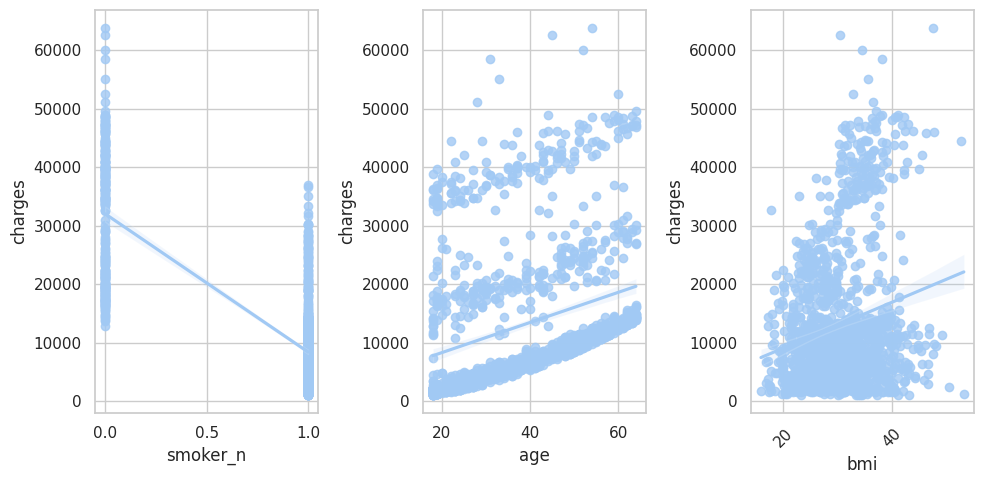

In [72]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)
sns.regplot(ax = axis[0], data = total_data, x = "smoker_n", y = "charges")
sns.regplot(ax = axis[1], data = total_data, x = "age", y = "charges")
sns.regplot(ax = axis[2], data = total_data, x = "bmi", y = "charges")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se ha decidido crear un reglot por cada una de esas correlaciones observadas en el anterior mapa de calor para observar, de otra manera, esta relación entre estas 3 variables significativas: smoker/age/bmi y la variable target, charges.

- En el primer caso, si bien línea de regresión es negativa, es muy notable, lo cual indica 

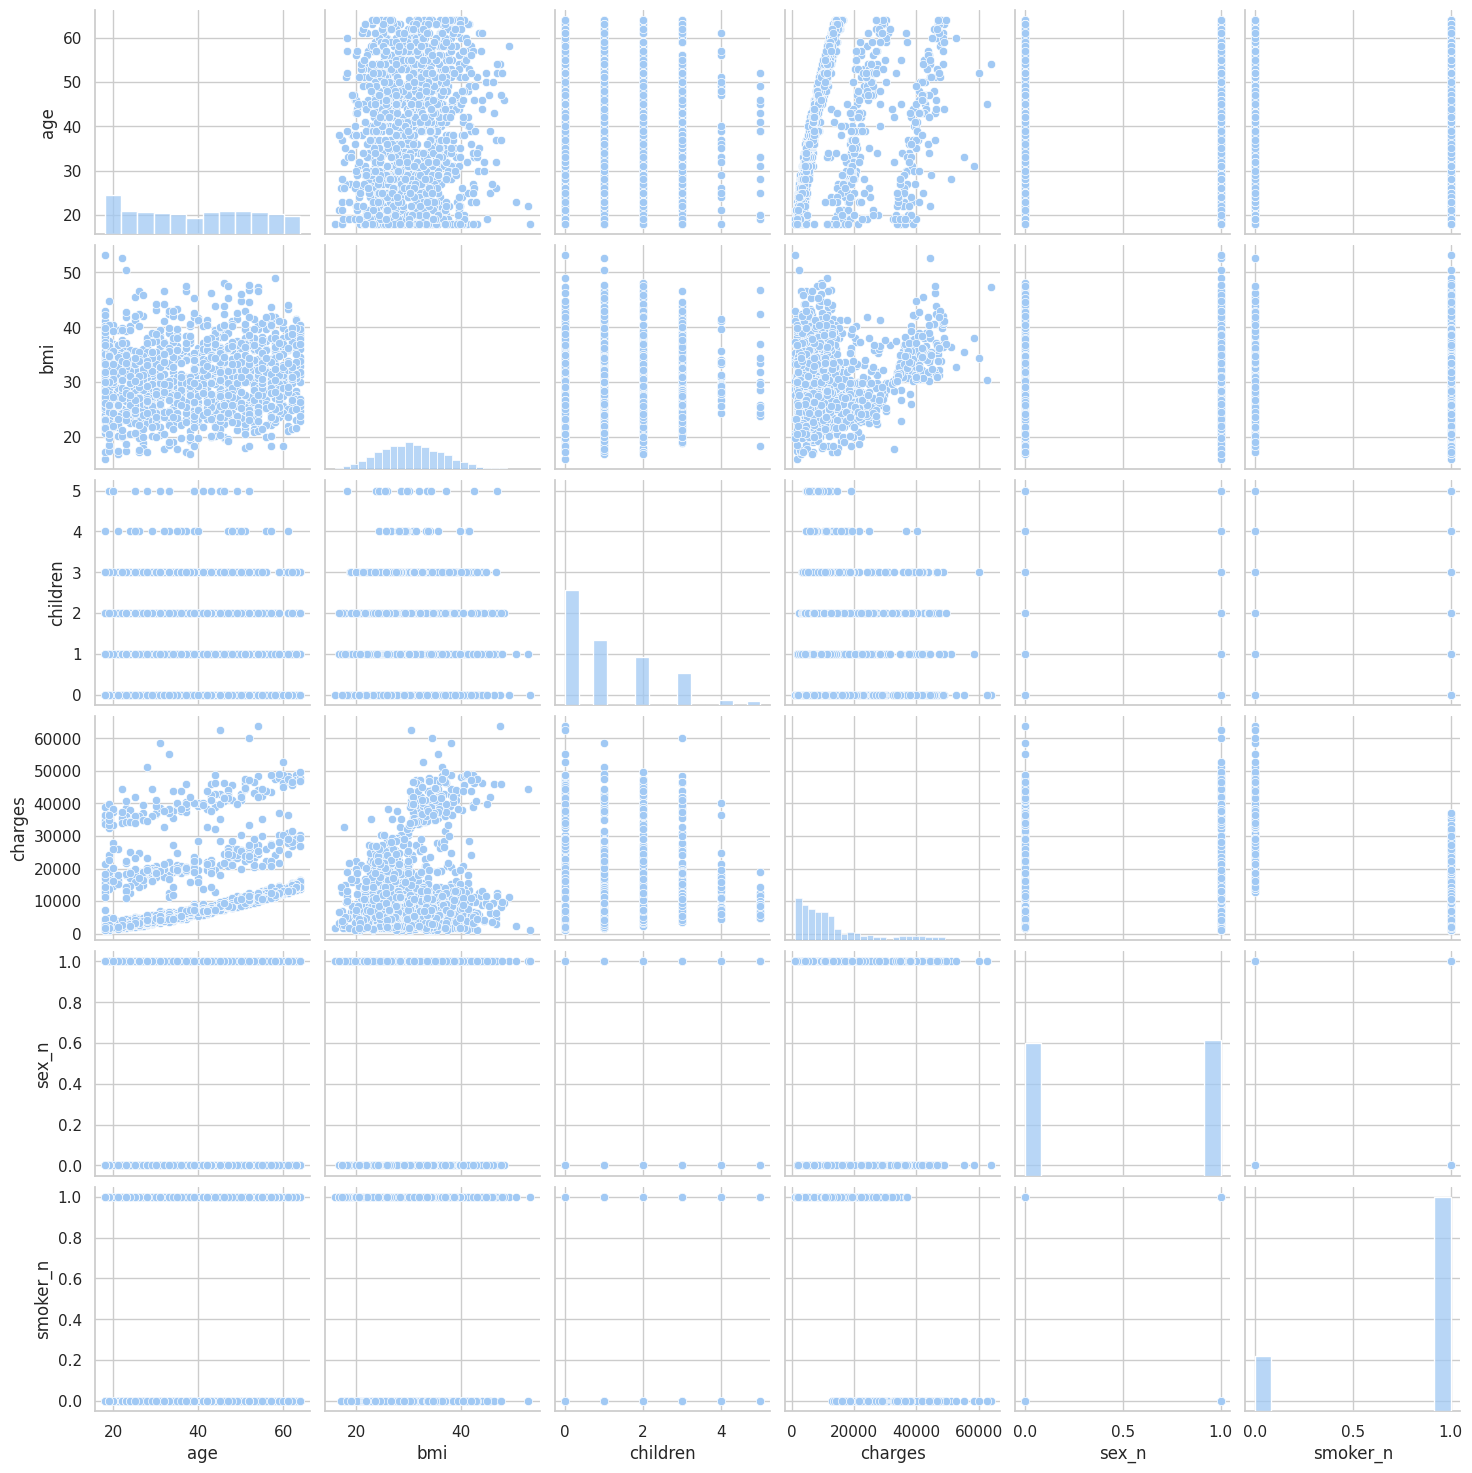

In [73]:
sns.pairplot(data = total_data)

In [74]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.0
mean,39.21,30.66,1.09,13270.42,0.51,0.8
std,14.05,6.10,1.21,12110.01,0.50,0.4
min,18.00,15.96,0.00,1121.87,0.00,0.0
25%,27.00,26.30,0.00,4740.29,0.00,1.0
50%,39.00,30.40,1.00,9382.03,1.00,1.0
75%,51.00,34.69,2.00,16639.91,1.00,1.0
max,64.00,53.13,5.00,63770.43,1.00,1.0


# 6. OUTLIERS (VALORES ATÍPICOS)

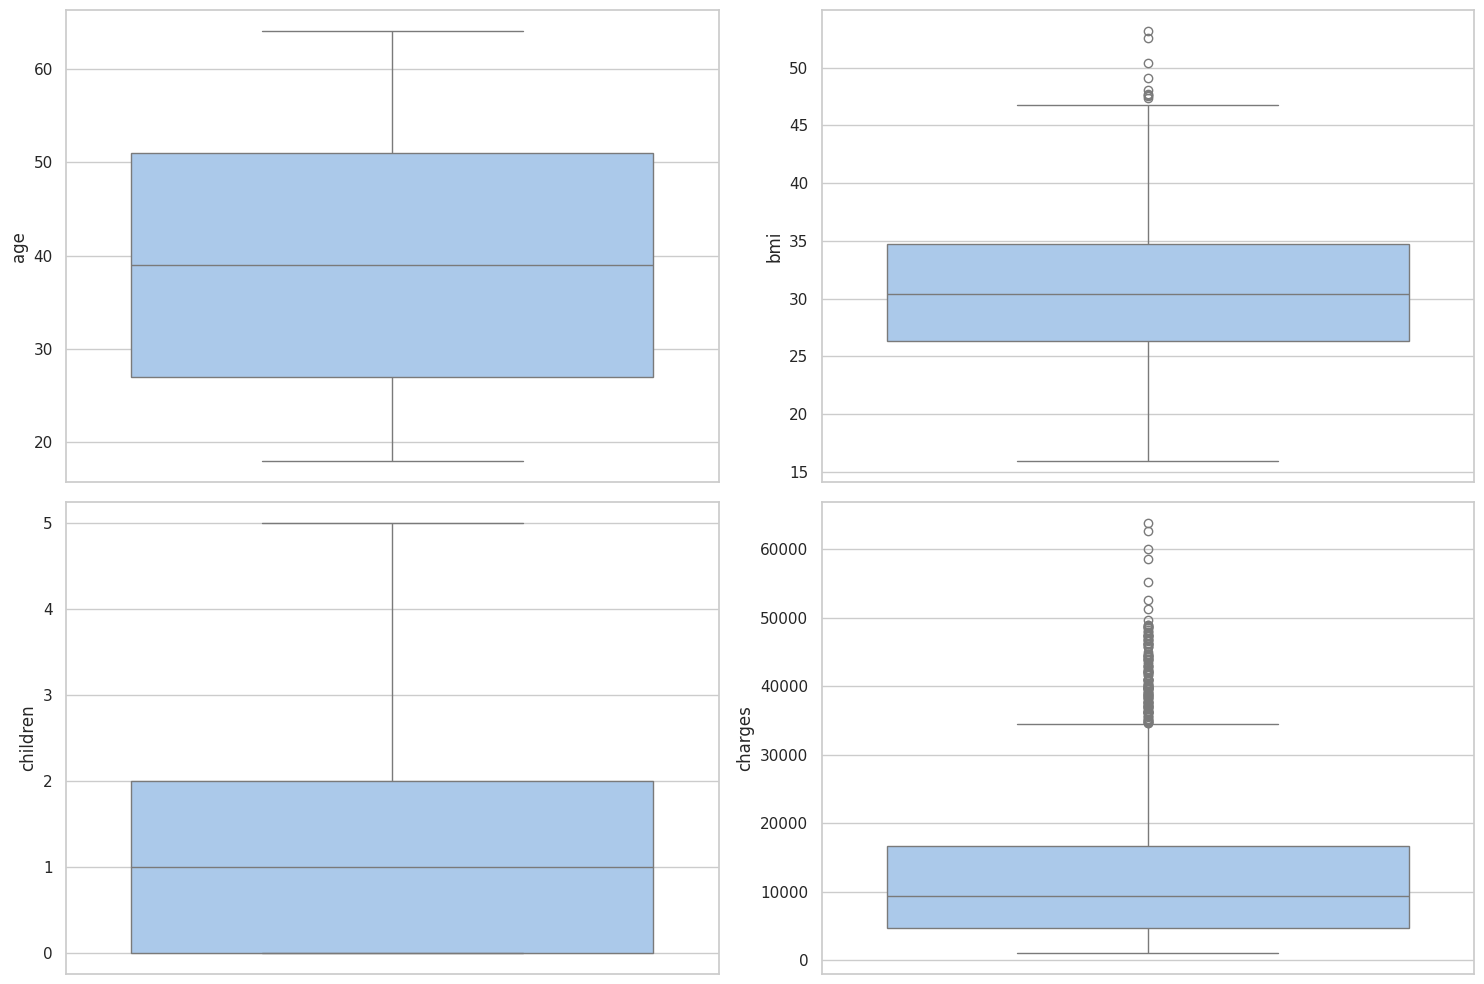

In [75]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "bmi")
sns.boxplot(ax = axis[1,0], data = total_data, y = "children")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "charges")


plt.tight_layout()

plt.show()

Para valorar los valores atípicos de este dataset hemos analizado las variables de edad, índice de masa corporal, hijos y cargos en diagramas de caja y bigotes. De este modo, hemos podido observar lo siguiente:

- En cuanto a las edades, no hay outliers. La caja se encuentra entre edades por encimad e los 25 y ligeramente superiores a 50, con bigote inferior ligeramente por debajo de los 20 y bigote superior ligeramente superior a los 50, como ya habíamos observado también en un gráfico univariante numérico anteriormente.

- En cuanto a los hijos, y como también habíamos observado con anterioridad, la caja  encuentra claramente entre 0 y 2 hijos, con bigote superior en los 5 hijos, sin outliers.

- En cuanto al índice de masa corporal: la caja se encuentra entre los 26 y 35, con un un bigote interior cercano a 16 y un bigote superior sobre la cifra de 47. En este caso sí se observan claros outliers por encima de dicho bigote, por lo que se tendrá en cuanta la columna BMI del dataset.

- En cuanto a los cargos, en este caso no podemos modificar outliers por ser nuestra "y" o target, pero también hemos querido analizarla. En este caso las cifras de la caja irían de valores sobre los 5.000 a los 27.000 aproximadamente, con un bigote interior rondando el 0 y un bigote inferior sobre los 35.000. Como en el caso anterior, se observan claros outliers por encima de este bigote superior, también muy interesante para el análisis predictivo que corresponde a este EDA. 

In [76]:
numerical_columns = [
  "age",  
  "children", 
  "charges", 
  "bmi", 
  ]

for column in numerical_columns:
  stats = total_data[column].describe()
  iqr = stats["75%"] - stats["25%"]
  upper_limit = stats["75%"] + 1.5 * iqr
  lower_limit = stats["75%"] - 1.5 * iqr
  if lower_limit < 0:
    lower_limit = 0
    print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 5.0 y 0, con un rango intercuartílico de 2.0
Los límites superior e inferior para la búsqueda de outliers son 34489.35 y 0, con un rango intercuartílico de 11899.63


In [77]:
total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()

def replace_outliers_from_column(column, total_data):
  column_stats = total_data[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(total_data[column])
  total_data[column] = total_data[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  total_data[column] = total_data[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return total_data.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['bmi']:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'bmi': [np.float64(13.7), np.float64(47.290000000000006)]}

In [78]:
total_data_CON_outliers

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.90,0,yes,16884.92,0,0
1,18,male,33.77,1,no,1725.55,1,1
2,28,male,33.00,3,no,4449.46,1,1
3,33,male,22.70,0,no,21984.47,1,1
4,32,male,28.88,0,no,3866.86,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,10600.55,1,1
1334,18,female,31.92,0,no,2205.98,0,1
1335,18,female,36.85,0,no,1629.83,0,1
1336,21,female,25.80,0,no,2007.94,0,1


In [79]:
total_data_SIN_outliers

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.90,0,yes,16884.92,0,0
1,18,male,33.77,1,no,1725.55,1,1
2,28,male,33.00,3,no,4449.46,1,1
3,33,male,22.70,0,no,21984.47,1,1
4,32,male,28.88,0,no,3866.86,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,10600.55,1,1
1334,18,female,31.92,0,no,2205.98,0,1
1335,18,female,36.85,0,no,1629.83,0,1
1336,21,female,25.80,0,no,2007.94,0,1


Ambos dataset, con y sin outliers, mantienen la "shape" ( 1338 rows x 8 columns) -> 6 + las 2 categóricas factorizadas (sex_n / smoker_n).

In [80]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

In [81]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

In [82]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
charges     0.0
sex_n       0.0
smoker_n    0.0
dtype: float64

En el presente EDA no necesitamos rellenar/reemplazar nulos ya que como podemos observar, tanto en el dataset con outliers como sin outliers no se encuentran valores nulos.

# 7. FEATURE ENGINEERING: "ESCALADO Y NORMALIZACIÓN DE VALORES"

In [83]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "children", "bmi", "sex_n", "smoker_n"]

# Comentario: Ahora SÍ es el turno de la división del conjunto de datos en muestras de train y test: 

X_CON = total_data_CON_outliers.drop("charges", axis = 1)[num_variables]
y = total_data_CON_outliers["charges"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("charges", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,age,children,bmi,sex_n,smoker_n
560,46,2,19.95,0,1
1285,47,0,24.32,0,1
1142,52,0,24.86,0,1
969,39,5,34.32,0,1
486,54,3,21.47,0,1


7.1 NORMALIZACIÓN:

In [84]:
from sklearn.preprocessing import StandardScaler
import pickle

normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,age,children,bmi,sex_n,smoker_n
560,0.47,0.73,-1.76,-1.02,0.51
1285,0.54,-0.91,-1.03,-1.02,0.51
1142,0.90,-0.91,-0.94,-1.02,0.51
969,-0.03,3.20,0.62,-1.02,0.51
486,1.04,1.56,-1.50,-1.02,0.51


7.2 ESCALADO MÍN-MAX:

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,age,children,bmi,sex_n,smoker_n
560,0.61,0.4,0.11,0.0,1.0
1285,0.63,0.0,0.22,0.0,1.0
1142,0.74,0.0,0.24,0.0,1.0
969,0.46,1.0,0.49,0.0,1.0
486,0.78,0.6,0.15,0.0,1.0


In [86]:
X_train_con_outliers.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_con_outliers.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/y_test.xlsx", index = False)

with open("/workspaces/ginappedrosa-ML-medical_insurance_cost/models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("/workspaces/ginappedrosa-ML-medical_insurance_cost/models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("/workspaces/ginappedrosa-ML-medical_insurance_cost/models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("/workspaces/ginappedrosa-ML-medical_insurance_cost/models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)


In [87]:
from sklearn.feature_selection import f_classif, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def best_k(x_train, y_train):
    scores = []    
    
    for k in range(1, x_train.shape[1] + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_new = selector.fit_transform(x_train, y_train)        # Modelo simple para comparar (usa el que prefieras)
        model = LinearRegression()
        cv_score = cross_val_score(model, X_new, y_train, cv=5, scoring='r2').mean()
        scores.append(cv_score)    # Mostrar el k con mejor score
    best_k = np.argmax(scores) + 1
    return best_k

k = best_k(X_train_sin_outliers_scal, y_train)

print(k)

selection_model = SelectKBest(f_classif, k = k)

selection_model.fit(X_train_con_outliers, y_train)

ix = selection_model.get_support()
X_train_con_outliers_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_con_outliers_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

X_train_con_outliers_sel.head()

4


/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,children,bmi,sex_n,smoker_n
0,2.0,19.95,0.0,1.0
1,0.0,24.32,0.0,1.0
2,0.0,24.86,0.0,1.0
3,5.0,34.32,0.0,1.0
4,3.0,21.47,0.0,1.0


In [88]:
selection_model.fit(X_train_sin_outliers, y_train)

ix = selection_model.get_support()
X_train_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])

X_train_sin_outliers_sel.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,children,bmi,sex_n,smoker_n
0,2.0,19.95,0.0,1.0
1,0.0,24.32,0.0,1.0
2,0.0,24.86,0.0,1.0
3,5.0,34.32,0.0,1.0
4,3.0,21.47,0.0,1.0


Con esta función:

def best_k(x_train, y_train):
    scores = []    
    
    for k in range(1, x_train.shape[1] + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_new = selector.fit_transform(x_train, y_train)        # Modelo simple para comparar (usa el que prefieras)
        model = LinearRegression()
        cv_score = cross_val_score(model, X_new, y_train, cv=5, scoring='r2').mean()
        scores.append(cv_score)    # Mostrar el k con mejor score
    best_k = np.argmax(scores) + 1
    return best_k

k = best_k(X_train_sin_outliers_scal, y_train)

print(k)

selection_model = SelectKBest(f_classif, k = k)

selection_model.fit(X_train_con_outliers, y_train)

Se ha decidido que son 4 las variables importantes para este caso de machine learning: children, bmi, sex_n, smoker_n. Por lo que la variable de "age/edad" no se ha considerado especialmente relevante.

In [89]:
X_test_con_outliers_sel.head()

,children,bmi,sex_n,smoker_n
0,2.0,25.18,0.0,1.0
1,0.0,30.02,0.0,1.0
2,0.0,26.89,0.0,0.0
3,3.0,25.75,1.0,1.0
4,0.0,31.92,1.0,0.0


In [90]:
X_test_sin_outliers_sel.head()

,children,bmi,sex_n,smoker_n
0,2.0,25.18,0.0,1.0
1,0.0,30.02,0.0,1.0
2,0.0,26.89,0.0,0.0
3,3.0,25.75,1.0,1.0
4,0.0,31.92,1.0,0.0


# 8. MODELO DE REGRESIÓN LINEAL

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

r2_results = []
mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
]:
    model = LinearRegression()
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))


R2 scores: [0.7410888590280913, 0.7414527196921326, 0.7410888590280913, 0.7414527196921326, 0.7410888590280913, 0.7414527196921326, 0.6523487419452709, 0.653049771715517]
Mejor R2: 0.7414527196921326
MSE: [37369582.73531941, 37317065.40779932, 37369582.73531941, 37317065.407799326, 37369582.73531941, 37317065.407799326, 50177765.24465448, 50076583.078831896]
Menor MSE: 37317065.40779932


Mejor dataset tanto a nivel de R2 como de MSE: X_train_con_outliers_sel (es decir, con outliers pero con las 4 variables elegidas como "k" - best k), es decir, eliminando edad del dataset y sin modificar los outliers de bmi.

In [92]:
y_pred_test = model.predict(X_test_con_outliers_sel)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("R2 en test:", r2_test)
print("MSE en test:", mse_test)

R2 en test: 0.693897083939932
MSE en test: 47522089.42425837


In [93]:
from sklearn.linear_model import Lasso

r2_results = []
mse_results = []

for dataset in [X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
]:
    model = Lasso(alpha = 0.1, max_iter = 300, random_state=42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

R2 scores: [0.7410888582240831, 0.7414527188882187, 0.741088858685697, 0.7414527193503004, 0.7410888540213987, 0.741452715404225, 0.6523487411406521, 0.6530497709111898]
Mejor R2: 0.7414527193503004
MSE: [37369582.85136481, 37317065.52383112, 37369582.78473842, 37317065.457137205, 37369583.457953475, 37317066.02668857, 50177765.36078802, 50076583.19492334]
Menor MSE: 37317065.457137205


Para optimizar el modelo en este EDA probaremos los modelos lineales regularizados de Lasso, Ridge y ElasticNet, previamente, como se observa, hemos aplicado el modelo LASSO.

In [94]:
from sklearn.linear_model import Ridge

r2_results = []
mse_results = []

for dataset in [X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
]:
    model = Ridge(alpha = 0.1, max_iter = 300, random_state=42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

R2 scores: [0.7410886503319838, 0.741452511089904, 0.7410888522993655, 0.7414527129695996, 0.7410882424172385, 0.7414522554113139, 0.6523485418662152, 0.6530495717341102]
Mejor R2: 0.7414527129695996
MSE: [37369612.85718449, 37317095.516114525, 37369583.70650077, 37317066.37808686, 37369671.73299711, 37317132.41913147, 50177794.122789256, 50076611.942872666]
Menor MSE: 37317066.37808686


In [95]:
from sklearn.linear_model import ElasticNet


r2_results = []
mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
]:
    model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=300, random_state=42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

R2 scores: [0.7062007100945331, 0.7065799710718368, 0.7393463202936672, 0.739711689658805, 0.682501582089196, 0.6855685078802295, 0.6188606990078948, 0.6195775222801168]
Mejor R2: 0.739711689658805
MSE: [42405115.63344295, 42350375.52293081, 37621089.662217624, 37568354.57840388, 45825696.61511055, 45383036.107490495, 55011215.77325874, 54907754.074092954]
Menor MSE: 37568354.57840388


In [96]:
model = Ridge(alpha = 0.1, max_iter = 300, random_state=42)
model.fit(X_train_con_outliers_sel, y_train)
y_pred_test = model.predict(X_test_con_outliers_sel)

r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("R2 en test:", r2_test)
print("MSE en test:", mse_test)

R2 en test: 0.6940822249743038
MSE en test: 47493346.513525076


El mejor modelo en este caso sería el Ridge para el caso actual, con un R2 de 100% y un MSE de 1.65 aproximadamente, muy bajo error.